In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# 統計的仮説検定の概要

## 統計的仮説検定
---
得られたデータから何か証明したい条件があるときに、間違うリスクを一定以下に抑えるリスクコントロールの手段。

### 標本分布と区間推定

練習問題

---
平均が $10$ ・標準偏差が $3$ の任意の確率分布から、 $50$ サンプル抽出して標本平均を求めたときの標本分布をグラフで表示する。 ([中心極限定理](../beginner/population_mean_estimation.ipynb#%E4%B8%AD%E5%BF%83%E6%A5%B5%E9%99%90%E5%AE%9A%E7%90%86-(central-limit-theorem))を利用する)

解答例

---

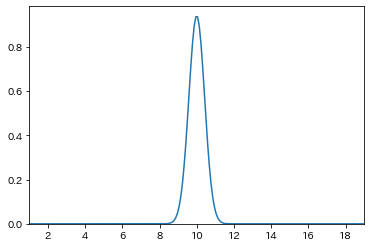

In [2]:
mu = 10
sigma = 3
n = 50
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 200)
plt.plot(x, stats.norm(10, sigma / np.sqrt(n)).pdf(x))
plt.xlim((x.min(), x.max()))
plt.ylim((0, plt.ylim()[1]))
plt.show()

---

練習問題

---
上の標本分布からサンプリングした場合に、平均を中心に $95\%$ のサンプルが含まれる範囲を求める。 ([区間推定](../beginner/population_mean_estimation.ipynb#%E5%8C%BA%E9%96%93%E6%8E%A8%E5%AE%9A-(interval-estimation))を参考に)

解答例

---

In [3]:
mu = 10
sigma = 3
n = 50
stats.norm(10, sigma / np.sqrt(n)).interval(0.95)

(9.168457705390193, 10.831542294609807)

---

### 統計的仮説検定の考え方
---
上の例では母平均 $10$ ・母標準偏差 $3$ が与えられていたが、通常は母分布のパラメーター (母数) はわからない。  
そこで、母数を仮定 (帰無仮説) し、標本分布 (帰無分布) を求める。その分布とサンプリングによって得られたパラメーターの推定値を比較し、**その分布から推定値が得られにくいものだった場合は元の仮定が間違っていた**可能性が高いと判断するのが統計的仮説検定。数学の背理法に似た論法。

#### 具体例
---
コイントスで使用するコインの不正を確かめる。
1. 仮に表の出る確率 ${\displaystyle p=\frac{1}{2}} $ である (コインに不正はない) として標本分布を求める (帰無分布)
1. 実際にコイントスを行ってみて標本平均 $\bar{x}$ を得る (サンプリング)
1. 帰無分布から生じにくい値の範囲とサンプリングで得られた値を比較する
1. サンプリングで得られた値が帰無分布から生じにくい範囲に含まれていればコインに不正がある疑いが濃厚になる

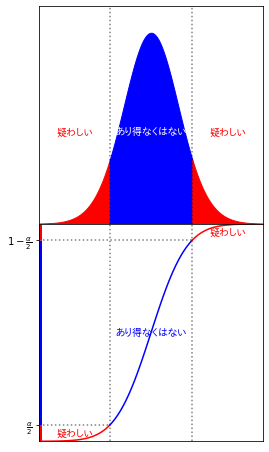

In [4]:
from my_functions.hypothesis_testing import concept
concept.show()

## GUIで実行してみる
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- `データ`->`データのインポート`->`テキストファイルまたはクリップボード, URLから`

として、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。`workspace/intermediate/data/coin.csv`を読み込む。`データセットを表示`をクリックし、内容を確認。

- `データ`->`アクティブデータセット`->`ケース名の設定`

として、`X`を選択し、`OK`をクリック。再度データセットを確認。

- `統計量`->`平均`->`1標本t検定`

として、`帰無仮説： μ=μ0 ： μ0=`を $0.5$ (表が出るはずの確率) にして、`OK`をクリック。

RStudio の Console に戻って、p-valueの値 (上のグラフの赤い部分の面積に相当) を確認。p-valueの値が小さければ不正があると判断。

## 用語の整理
---
上で仮置きした条件のことを「帰無仮説 (null hypothesis) 」といい、通常 $H_{0}$ で表す。また、最終的に主張したいことを「対立仮説 (alternative hypothesis) 」といい、通常 $H_{1}$ で表す。

帰無仮説が疑わしいとして否定することを「棄却 (reject) 」といい、帰無仮説または対立仮説を受け入れることを「採択 (accept)」という。

帰無仮説を前提とした確率分布からは発生しにくい、つまり帰無仮説が間違っていると疑う十分な理由があることを「有意 (significant) 」という。

どれくらい発生しにくければ有意であると判断するかの水準を「有意水準 (significance level) 」 (または危険率) といい、通常 $\alpha$ で表す。有意水準には $5\%(\alpha =0.05)$ や $1\%(\alpha =0.01)$ がよく使われる。

帰無仮説が正しいのに、それを棄却してしまうことを「第一種の誤り (error of the first kind) 」、帰無仮説が間違っているのに、それを採択してしまうことを「第二種の誤り (error of the second kind) 」という。

<table class="text-center background-white">
    <tr>
        <td rowspan="2" colspan="2" class="border-none"></td>
        <th colspan="2" class="border border-bottom background-dark">真の分布 (母数に基づく標本分布)</th>
    </tr>
    <tr class="border">
        <td>$H_{1}$ (対立仮説) が正しい<br />(自分の主張が正しい)</td>
        <td>$H_{0}$ (帰無仮説) が正しい<br />(自分の主張が誤り)</td>
    </tr>
    <tr class="border">
        <th rowspan="2" class="border-bottom background-dark">判断</th>
        <td>$H_{0}$ (帰無仮説) を棄却<br />(自分の主張が正しかったと結論)</td>
        <td class="text-blue">正解</td>
        <td class="text-red">第一種の誤り</td>
        <td rowspan="2" class="background-dark">↑<br />−−− 有意水準 $\alpha$ −−−<br />↓</td>
    </tr>
    <tr class="border">
        <td>$H_{0}$ (帰無仮説) を採択<br />(自分の主張が誤っていたと結論)</td>
        <td class="text-red">第二種の誤り</td>
        <td class="text-blue">正解</td>
    </tr>
    <tr>
        <td colspan="2" class="border-none"></td>
        <td colspan="2" class="border background-dark">コントロール不能</td>
    </tr>
</table>

<table class="border">
    <tr>
        <th class="text-center border-bottom border-right-bold">帰無仮説</th>
        <td class="text-left">仮置きした条件</td>
        <td class="text-left">コインに偏りはない ${\displaystyle \left( p=\frac{1}{2}\right) }$</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">対立仮説</th>
        <td class="text-left">最終的に主張したいこと</td>
        <td class="text-left">コインは偏っている ${\displaystyle \left( p\neq \frac{1}{2}\right) }$</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">有意水準</th>
        <td class="text-left">発生しにくいと判断する水準</td>
        <td class="text-left">帰無分布の両端 $5\% (2.5\% +2.5\% )$ の範囲の値が得られたら帰無仮説を疑う</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">有意</th>
        <td class="text-left">帰無仮説が間違っていると疑う十分な理由があること</td>
        <td class="text-left">帰無分布からは $3\%$ 程度の確率でしか発生しない領域の値が得られた</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">棄却</th>
        <td class="text-left">帰無仮説を否定すること</td>
        <td class="text-left">コインは偏っている ${\displaystyle \left( p=\frac{1}{2}\right) }$ と結論づける</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">採択</th>
        <td class="text-left">帰無仮説または対立仮説を受け入れること</td>
        <td class="text-left"></td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">第一種の誤り</th>
        <td class="text-left">帰無仮説が正しいのに棄却してしまうこと</td>
        <td class="text-left">コインは偏っていないのに、偏っていると結論づけてしまう</td>
    </tr>
    <tr>
        <th class="text-center border-bottom border-right-bold">第二種の誤り</th>
        <td class="text-left">帰無仮説が誤っているのに採択してしまうこと</td>
        <td class="text-left">コインは偏っているのに、偏っていないと結論づけてしまう</td>
    </tr>
</table>

## 検定の手順
---
1. 最終的に主張したい対立仮説を考える
1. 対応する帰無仮説を設定する
1. 有意水準を設定する
1. サンプリングする
1. p 値 (得られた統計量より外側の値が得られる確率) を求める
1. p 値を有意水準と比較して帰無仮説を棄却するかどうか決める

## 検定の種類

### 両側検定 (two-sided test)
---
帰無分布の両端に棄却域 (rejection region) を設けるものを両側検定という。

In [5]:
from my_functions.hypothesis_testing import two_sided
two_sided.show()

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='有意水準', max=0.3, min=0.01, …

練習問題

---
正規分布から任意の数のサンプルを抽出し、標本平均を求めるとする。帰無分布を標準正規分布 $\mathcal{N}( 0,1)$ とし、両側検定を行う。  
サンプリングにより検定統計量 (ここでは標本平均) $2.5$ が得られた場合の p 値を求める。

解答例

---

In [6]:
mean = 0
std = 1
null_dist = stats.norm(mean, std)
upper = 2.5
lower = mean - (upper - mean)
p = null_dist.cdf(lower) + null_dist.sf(upper)
p

0.012419330651552265

In [7]:
# 帰無分布が左右対称なので、片側だけ求めて2倍にしても同じ
p = null_dist.sf(upper) * 2
p

0.012419330651552265

---

### 片側検定 (one-sided test)
---
帰無分布の片側にしか棄却域を設けないものを片側検定という。  
片側検定は分布のどちら側に棄却域を設けるかでさらに左側検定と右側検定に分かれる。

In [8]:
from my_functions.hypothesis_testing import one_sided
one_sided.show()

interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='有意水準', max=0.3, min=0.01, …

練習問題

---
正規分布から任意の数のサンプルを抽出し、標本平均を求めるとする。帰無分布を標準正規分布 $\mathcal{N}( 0,1)$ とし、左側検定を行う。  
サンプリングにより検定統計量 (ここでは標本平均) $-1.2$ が得られた場合の p 値を求める。

解答例

---

In [9]:
mean = 0
std = 1
null_dist = stats.norm(mean, std)
stat = -1.2
p = null_dist.cdf(stat)
p

0.11506967022170822

---

練習問題

---
正規分布から任意の数のサンプルを抽出し、標本平均を求めるとする。帰無分布を標準正規分布 $\mathcal{N}( 0,1)$ とし、右側検定を行う。  
サンプリングにより検定統計量 (ここでは標本平均) $2.5$ が得られた場合の p 値を求める。

解答例

---

In [10]:
mean = 0
std = 1
null_dist = stats.norm(mean, std)
stat = 2.5
p = null_dist.sf(stat)
p

0.006209665325776132

---

### 棄却域の位置の使い分け
---
<table class="text-center border">
    <tr class="background-dark">
        <th>主張したいこと</th>
        <th>対立仮説 $H_1$</th>
        <th>検定の種類</th>
        <th>棄却域</th>
        <th>帰無仮説 $H_0$</th>
    </tr>
    <tr class="background-bright">
        <td>対象とする統計量 ($\phi$) の値 ($a$) がある値 ($b$) と異なる</td>
        <td>$a\neq b$</td>
        <td>両側検定</td>
        <td style="min-width: 12em;">$\phi<\phi_{1-\frac{\alpha}{2}},\ \phi_{\frac{\alpha}{2}}<\phi$</td>
        <td rowspan="3">$a=b$</td>
    </tr>
    <tr class="background-bright">
        <td class="text-left">対象とする統計量 ($\phi$) の値 ($a$) がある値 ($b$) より大きい</td>
        <td>$a>b$</td>
        <td>右側検定</td>
        <td>$\phi_{\alpha}<\phi$</td>
    </tr>
    <tr class="background-bright">
        <td class="text-left">対象とする統計量 ($\phi$) の値 ($a$) がある値 ($b$) より小さい</td>
        <td>$a<b$</td>
        <td>左側検定</td>
        <td>$\phi<\phi_{\alpha}$</td>
    </tr>
</table>

## 注意点

### 結論の意味
---
帰無仮説が棄却された場合には、対立仮説が確からしいことが確認されるが、帰無仮説が採択された場合には、**帰無仮説が確からしいことが確認されるわけではない**。 (このことから帰無仮説を「採択」するとは言わない立場が多い)

- 帰無仮説を棄却 → 対立仮説が正しそう
- 帰無仮説を採択 → 結論はグレー (何も積極的には主張できない)

帰無仮説を棄却した場合も**対立仮説が証明されたわけではなく**、有意水準 $\alpha$ の下で対立仮説が確からしいことが保証されるだけ。

### 有意水準の意味
---
有意水準 $\alpha $ が表しているのは、帰無仮説が正しい (自分の主張が誤っていた) ときに帰無仮説を棄却する第一種の誤りを犯す危険性。  
**帰無仮説が誤っているときに正しく棄却できる確率ではない**。

下のグラフでは、標本分布 (実際には確認不可能) を点線、帰無分布 (確認可能) を実線、標本分布からその値が得られる確率 (実際に存在する) を色つき、採択域・棄却域 (実際にサンプルが得られる確率とは無関係) を白黒で表現。

In [11]:
from my_functions.hypothesis_testing import alpha
alpha.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='母平均と標本平均の差', max=3.0, min=-…

練習問題

---
平均 $5$ 、標準偏差 $10$ の正規分布 (母分布) から $100$ 個のサンプルを抽出して平均を求めるとすると、その標本分布は平均 $5$ 、標準偏差 $1$ の正規分布になる。  
このとき、帰無分布を仮に平均 $4.5$ 、標準偏差 $1$ の正規分布とし、有意水準を $\alpha =0.05$ にして両側検定を行った場合に、正しく帰無仮説を棄却できる確率を求める。

解答例

---

In [12]:
std = 1
sample_dist = stats.norm(5, std)
null_dist = stats.norm(4.5, std)
lower, upper = null_dist.interval(1 - 0.05)
sample_dist.cdf(lower) + sample_dist.sf(upper)

0.07909753416059649

---

練習問題

---
上と同じ条件で、帰無仮説を平均 $4$ 、$5.1$ とした場合の確率をそれぞれ求める。

解答例

---

In [13]:
std = 1
sample_dist = stats.norm(5, std)


def prob(null_hypothesis):
    null_dist = stats.norm(null_hypothesis, std)
    lower, upper = null_dist.interval(1 - 0.05)
    return sample_dist.cdf(lower) + sample_dist.sf(upper)


for null_hypothesis in [4, 5.1]:
    print(f'平均{null_hypothesis:<.1f}の場合 : {prob(null_hypothesis):.2f}')

平均4.0の場合 : 0.17
平均5.1の場合 : 0.05


---

### 安易なp値の利用に対する警告
---
アメリカ統計協会から統計的有意と p 値について[声明](https://amstat.tandfonline.com/doi/full/10.1080/00031305.2016.1154108#.XM-c95P7RN0)が発表されている。

1. P-values can indicate how incompatible the data are with a specified statistical model.
 - p 値が指し示すのは特定の統計モデルとどれくらい矛盾するかである
1. P-values do not measure the probability that the studied hypothesis is true, or the probability that the data were produced by random chance alone.
 - p 値は得られた結論が正しい確率を測るものでも、データが純粋にランダムに生成された確率を測るものでもない
1. Scientific conclusions and business or policy decisions should not be based only on whether a p-value passes a specific threshold.
 - 科学的結論もビジネスあるいは政策上の決定も p 値がある閾値を超えたかどうかで下されるべきではない
1. Proper inference requires full reporting and transparency.
 - 適切な推論には完全な報告と透明性が必要である (都合の良いものだけを選んではならない)
1. A p-value, or statistical significance, does not measure the size of an effect or the importance of a result.
 - p 値や統計的有意は結果の影響や重要性の大きさを測るものではない
1. By itself, a p-value does not provide a good measure of evidence regarding a model or hypothesis. 
 - p 値だけではモデルや仮説に関するエビデンス (証明) の良い指標にはならない

#### 対策
---
以下のような手法 (の併用、あるいは代替) が紹介されている。

- 検定よりも予測を重視する手法
- ベイズ統計学的な手法
- 尤度比やベイズ因子などの代替的なエビデンスの指標
- 決定理論的モデリングや False Discovery Rate など

いずれも銀の弾丸になるわけではないので、**まずは通常の統計的検定の枠組みとその限界を理解**し、必要に応じて他の手法を理解していく。

## 推薦図書
---
- [Rによるやさしい統計学](https://www.amazon.co.jp/R%E3%81%AB%E3%82%88%E3%82%8B%E3%82%84%E3%81%95%E3%81%97%E3%81%84%E7%B5%B1%E8%A8%88%E5%AD%A6-%E5%B1%B1%E7%94%B0-%E5%89%9B%E5%8F%B2/dp/4274067106/)
- [心理統計学の基礎―統合的理解のために](https://www.amazon.co.jp/%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%88%E5%AD%A6%E3%81%AE%E5%9F%BA%E7%A4%8E%E2%80%95%E7%B5%B1%E5%90%88%E7%9A%84%E7%90%86%E8%A7%A3%E3%81%AE%E3%81%9F%E3%82%81%E3%81%AB-%E6%9C%89%E6%96%90%E9%96%A3%E3%82%A2%E3%83%AB%E3%83%9E-%E5%8D%97%E9%A2%A8%E5%8E%9F-%E6%9C%9D%E5%92%8C/dp/4641121605/)